Load javascript libraries
===========================
**loading three.js and some three.js example code -- git clone git://github.com/mrdoob/three.js.git in your notebook directory**
**loading d3.js -- git clone git://github.com/mbostock/d3.git**

In [1]:
%%html
<script type="text/javascript" src="files/three.js/build/three.js"></script>
<script type="text/javascript" src="files/three.js/examples/js/controls/TrackballControls.js"></script>
<script type="text/javascript" src="files/d3/d3.v2.js"></script>

**defining a toy "proteus.js" widget library**

In [2]:
%%html
<script type="text/javascript">
    // define the widgets
    
    //first the raw plotting stuff using a plotObject read from a JSON message

    //2D is just a dummy implementation right now--need to use the plotObject
    plot_rectangularDomain_2d = function(plotObject)
        {
            this.element.append("<div id='mydiv'></div>")
            var rectDemo = d3.select("#mydiv")
                .append("svg")
                .attr("width", 400)
                .attr("height", 400);
            rectDemo.append("rect")
                .style("stroke", "red")
                .style("fill", "white")
                .attr("x",25)
                .attr("y",25)
                .attr("width",350)
                .attr("height", 350)
                .on("mouseover", function(){d3.select(this).style("fill", "red");})
                .on("mouseout", function(){d3.select(this).style("fill", "white");});
            $(".container").show();
        }
        //3D plots a cube and allows animation, etc.
    plot_rectangularDomain_3d = function(plotObject)
        {
            var renderer, scene, camera, light,controls;
            mycanvas = document.getElementById("canvas_"+plotObject.objectName+"_"+plotObject.widgetNumber);
            renderer = new THREE.WebGLRenderer({'canvas':document.getElementById("canvas_"+plotObject.objectName+"_"+plotObject.widgetNumber)});
            scene = new THREE.Scene();
            camera = new THREE.PerspectiveCamera(
                                                35,             // Field of view
                                                800 / 600,      // Aspect ratio
                                                0.1,            // Near plane
                                                10000           // Far plane
                                            );
            camera.position.set( -15, 10, 10 );
            camera.lookAt( scene.position );
            scene.add( camera );
            var cubeMaterialArray = [];
            // order to add materials: x+,x-,y+,y-,z+,z-
            cubeMaterialArray.push( new THREE.MeshBasicMaterial( { color: 0xff3333 } ) );
            cubeMaterialArray.push( new THREE.MeshBasicMaterial( { color: 0xff8800 } ) );
            cubeMaterialArray.push( new THREE.MeshBasicMaterial( { color: 0xffff33 } ) );
            cubeMaterialArray.push( new THREE.MeshBasicMaterial( { color: 0x33ff33 } ) );
            cubeMaterialArray.push( new THREE.MeshBasicMaterial( { color: 0x3333ff } ) );
            cubeMaterialArray.push( new THREE.MeshBasicMaterial( { color: 0x8833ff } ) );
            var cube = new THREE.Mesh(
                new THREE.CubeGeometry(plotObject.L[0], plotObject.L[1], plotObject.L[2], 0, 0, 0,cubeMaterialArray),
                new THREE.MeshFaceMaterial()
                                        );
            scene.add( cube );
            light = new THREE.AmbientLight( 0xF00000 );
            scene.add( light );    
            controls = new THREE.TrackballControls( camera,mycanvas );
            controls.rotateSpeed = 1.0;
            controls.zoomSpeed = 0.1;
            controls.panSpeed = 0.8;
            renderer.render( scene, camera );
            function animate()
            {
                requestAnimationFrame(animate);
                controls.update();
                renderer.render(scene,camera)
            }
            animate();
        };
    //initialize the slider values 
    init_rectangularDomain = function(Lx,Ly,Lz,objectName,widgetNumber)
        {
            console.log("init_rectangularDomain");
             
                console.log(objectName);
                console.log(widgetNumber);
                console.log(Lx);console.log(Ly);console.log(Lz);
                $('div#Lx_slider_'+objectName+'_'+widgetNumber).slider(
                {
                    min : 0,
                    max : 100,
                    value : Lx,
                    slide : request_update,
                    change: request_update
                }
                );
                $('div#Ly_slider_'+objectName+'_'+widgetNumber).slider(
                {
                    min : 0,
                    max : 100,
                    value : Ly,
                    slide : request_update,
                    change: request_update
                }
                );
                $('div#Lz_slider_'+objectName+'_'+widgetNumber).slider(
                {
                    min : 0,
                    max : 100,
                    value : Lz,
                    slide : request_update,
                    change: request_update
                }
                );

             
                $('span#Lx_label_'+objectName+'_'+widgetNumber).text("Lx = " + Lx);

                
                $('span#Ly_label_'+objectName+'_'+widgetNumber).text("Ly = " + Ly);

                
                $('span#Lz_label_'+objectName+'_'+widgetNumber).text("Lz = " + Lz);
                
        };
    //callback function for updating the plot with the output of a request generated by the sliders
    update_rectangularDomain_plot_js = function(msg_type, content)
        {
            if (msg_type !== 'display_data')
                return;
            var plotObject_json = content['data']['application/json'];
            if (plotObject_json != undefined)
            {
                plotObject = JSON.parse(plotObject_json);
                switch(plotObject.nd)
                {
                    case 1:
                        plot_rectangularDomain_1d(plotObject);
                        break;
                    case 2:
                        plot_rectangularDomain_2d(plotObject);
                        break;
                    case 3:
                        plot_rectangularDomain_3d(plotObject);
                        break;
                    default:
                         console.log("update_rectangularDomain_js doesn't know how to plot an nd="+plotObject.nd+" object")
                }                    
            } 
            else 
            {
                console.log("update_rectangularDomain_js got no json");
                console.log(data);
            }
        };
    //the javascript function to be used by the javascript generated by python, plays the role of the handler for now
    update_rectangularDomain = function(objectName,widgetNumber)
        {
            console.log("update_rectangularDomain");
            console.log(objectName);
            console.log(widgetNumber);
            var kernel = IPython.notebook.kernel;
            if (!kernel) return;
            
            // execute update on the kernel
            var Lx = $('div#Lx_slider_'+objectName+'_'+widgetNumber).slider("value");
            $('span#Lx_label_'+objectName+'_'+widgetNumber).text("Lx = " + Lx);

            var Ly = $('div#Ly_slider_'+objectName+'_'+widgetNumber).slider("value");
            $('span#Ly_label_'+objectName+'_'+widgetNumber).text("Ly = " + Ly);

            var Lz = $('div#Lz_slider_'+objectName+'_'+widgetNumber).slider("value");
            $('span#Lz_label_'+objectName+'_'+widgetNumber).text("Lz = " + Lz);

            var jsonObject = {"L": [Lx,Ly,Lz]};
            var jsonString = JSON.stringify(jsonObject);
            console.log("kernel.execute");
            console.log("jsonObject");
            console.log(jsonObject);
            console.log("jsonString");
            console.log(jsonString);
            kernel.execute(objectName+".update_rectangularDomain_py(" + jsonString + ")", {'output': update_rectangularDomain_plot_js});
        };
    //a thin wrapper to fit the slider callback signature
    request_update = function(event,ui)
        {
            update_rectangularDomain($(ui.handle).parent().attr('objectName'),$(ui.handle).parent().attr('widgetNumber'));
        };
</script>

Create a simple class to represent a rectangular domain and make it display nicely
==================================================================================

In [3]:
from IPython.core.display import *
import json
class RectangularDomain:
    """
    A simple rectangular domain
    """
    def __init__(self,nd,objectName="defaultDomain",units="m"):
        """
        Set dimensions (nd), name string, and units string
        """
        if nd not in [1,2,3]:
            raise RuntimeError("Domain object must have dimension 1,2, or 3")
        self.nd=nd
        self.objectName=objectName
        self.units=units
        self.x=[0.0,0.0,0.0]#minx,miny,minz
        self.L=[1.0,1.0,1.0]#bounding box when self.x is origin
        #
        #stuff for IPython display protocol graphical representations
        #
        self.widgetNumber = 0
        self._png_data = None
        self._svg_data = None
        self._js_data = None
        self._html_data = None
        self._javascript_data = None
        self._math_data = None
        self._latex_data = None
        self._json_data = None

    def __repr__(self):
        if self.L == None:
            return "domain "+`self.objectName`+"is uninitialized"
        else:
            return "domain "+`self.objectName`+" lower left corner, x = "+`self.x`+"; dimensions, L = "+`self.L`
    
    def _graph_data(self,format):
        """
        Build a graphical representation of the domain
        """
        if format == 'math':
            if self._math_data == None:
                if self.nd == 1:
                    self._math_data = r"\left(%(x)s,%(xr)s\right)" % \
                        {'x':self.x[0],'xr':self.x[0]+self.L[0]}
                if self.nd == 2:
                    self._math_data = r"\left(%(x)s,%(xr)s\right) \times \left(%(y)s,%(yr)s\right)" % \
                    {'x':self.x[0],'y':self.x[1],'xr':self.x[0]+self.L[0],'yr':self.x[1]+self.L[1]}
                if self.nd == 3:
                    self._math_data = r"\left(%(x)s,%(xr)s\right) \times \left(%(y)s,%(yr)s\right) \times \left(%(z)s,%(zr)s\right)" % \
                    {'x':self.x[0],'y':self.x[1],'z':self.x[2],'xr':self.x[0]+self.L[0],'yr':self.x[1]+self.L[1],'zr':self.x[2]+self.L[2]}
            data = self._math_data
        elif format == 'latex':
            if self._latex_data == None:
                if self._math_data == None:
                    self._graph_data('math')
                self._latex_data = '$$'+self._math_data+'$$'
            data = self._latex_data
        elif format == "json":
            if self._json_data == None:
                self._json_data = json.dumps(self.__dict__)
            data = self._json_data
        elif format == "html":
            if self._html_data == None:
                if self.nd == 2:
                    self._html_data = """<div id=%(objectName)s_%(widgetNumber)s objectName=%(objectName)s widgetNumber=%(widgetNumber)s style="width:600px;height:300px;"></div>

<br/>
<span id="Lx_label_%(objectName)s_%(widgetNumber)s" objectName=%(objectName)s widgetNumber=%(widgetNumber)s></span>
<div id="Lx_slider_%(objectName)s_%(widgetNumber)s" objectName=%(objectName)s widgetNumber=%(widgetNumber)s></div>

<span id="Ly_label_%(objectName)s_%(widgetNumber)s" objectName=%(objectName)s widgetNumber=%(widgetNumber)s></span>
<div id="Ly_slider_%(objectName)s_%(widgetNumber)s" objectName=%(objectName)s widgetNumber=%(widgetNumber)s></div>

<span id="Lz_label_%(objectName)s_%(widgetNumber)s" objectName=%(objectName)s widgetNumber=%(widgetNumber)s></span>
<div id="Lz_slider_%(objectName)s_%(widgetNumber)s" objectName=%(objectName)s widgetNumber=%(widgetNumber)s></div>
""" % {'objectName':self.objectName,'widgetNumber':self.widgetNumber}
                elif self.nd == 3:
                        self._html_data = """
<div id=%(objectName)s_%(widgetNumber)s objectName=%(objectName)s widgetNumber=%(widgetNumber)s style="width:600px;height:300px;"></div>

<canvas id="canvas_%(objectName)s_%(widgetNumber)s" objectName=%(objectName)s widgetNumber=%(widgetNumber)s style="border: none;" width="800" height="600"></canvas>
</br>
<span id="Lx_label_%(objectName)s_%(widgetNumber)s" objectName=%(objectName)s widgetNumber=%(widgetNumber)s></span>
<div id="Lx_slider_%(objectName)s_%(widgetNumber)s" objectName=%(objectName)s widgetNumber=%(widgetNumber)s></div>

<span id="Ly_label_%(objectName)s_%(widgetNumber)s" objectName=%(objectName)s widgetNumber=%(widgetNumber)s></span>
<div id="Ly_slider_%(objectName)s_%(widgetNumber)s" objectName=%(objectName)s widgetNumber=%(widgetNumber)s></div>

<span id="Lz_label_%(objectName)s_%(widgetNumber)s" objectName=%(objectName)s widgetNumber=%(widgetNumber)s></span>
<div id="Lz_slider_%(objectName)s_%(widgetNumber)s" objectName=%(objectName)s widgetNumber=%(widgetNumber)s></div>
""" % {'objectName':self.objectName,'widgetNumber':self.widgetNumber}
            data = self._html_data
        elif format == "javascript":
            if self._javascript_data == None:
                self._javascript_data = """
init_rectangularDomain('%f','%f','%f','%s','%s');
update_rectangularDomain('%s','%s');""" % (self.L[0],self.L[1],self.L[2],self.objectName,self.widgetNumber,self.objectName,self.widgetNumber)
            data = self._javascript_data
        elif format == "svg":
            if self._svg_data == None:
                self._svg_data = r"""
<svg width="400" height="400"><rect style="stroke: #ff0000; fill: #ffffff" x="25" y="25" width="350" height="350"></rect></svg>
"""
            data = self._svg_data
        return data
    
    def _repr_pretty(self):
        if self.L == None:
            return self._repr()
        else:
            if self.nd == 1:
                return r"(%(x)s,%(xr)s) " % {'x':self.x[0],'xr':self.x[0]+self.L[0]}
            if self.nd == 2:
                return r"(%(x)s,%(xr)s) x (%(y)s,%(yr)s)" % {'x':self.x[0],'y':self.x[1],
                                                            'xr':self.x[0]+self.L[0],'yr':self.x[1]+self.L[1]}
            if self.nd == 3:
                return r"(%(x)s,%(xr)s) x (%(y)s,%(yr)s) x (%(z)s,%(zr)s)" % {'x':self.x[0],
                                                                             'y':self.x[1],
                                                                             'z':self.x[2],
                                                                             'xr':self.x[0]+self.L[0],
                                                                             'yr':self.x[1]+self.L[1],
                                                                             'zr':self.x[2]+self.L[2]}
    @property
    def pretty(self):
        return self._repr_pretty()
    
    def _repr_png_(self):
        if self._png_data is None:
            self._png_data = self._graph_data('png')
        return self._png_data
    @property
    def png(self):
        return Image(self._repr_png_(), embed=True)
    
    def _repr_svg_(self):
        if self._svg_data is None:
            self._svg_data = self._graph_data('svg')
        return self._svg_data
    @property
    def svg(self):
        return SVG(self._repr_svg_())
    
    def _repr_html_(self):
        if self._html_data is None:
            self._html_data = self._graph_data('html')
        return self._html_data
    @property
    def html(self):
        return HTML(self._repr_html_())

    def _repr_javascript_(self):
        if self._javascript_data is None:
            self._javascript_data = self._graph_data('javascript')
        return self._javascript_data
    @property
    def javascript(self):
        return Javascript(self._repr_javascript_())

    def _repr_math_(self):
        if self._math_data is None:
            self._math_data = self._graph_data('math')
        return self._math_data
    @property
    def math(self):
        return Math(self._repr_math_())

    def _repr_latex_(self):
        if self._latex_data is None:
            self._latex_data = self._graph_data('latex')
        return self._latex_data
    @property
    def latex(self):
        return Latex(self._repr_latex_())

    def _repr_json_(self):
        if self._json_data is None:
            self._json_data = self._graph_data('json')
        return self._json_data
    @property
    def json(self):
        return JSON(self._repr_json_())
    def edit(self):
        self.widgetNumber = self.widgetNumber + 1
        display(self.html)
        display(self.javascript)
    def update_rectangularDomain_py(self,jsonObject):
        self.L = jsonObject['L']
        display(JSON(json.dumps(self.__dict__)))

In [4]:
box3d = RectangularDomain(3,objectName="box3d",units="cm")
repr(box3d)

"domain 'box3d' lower left corner, x = [0.0, 0.0, 0.0]; dimensions, L = [1.0, 1.0, 1.0]"

In [5]:
box3d.math

<IPython.core.display.Math object>

In [6]:
box3d.latex

<IPython.core.display.Latex object>

In [7]:
box3d.pretty

'(0.0,1.0) x (0.0,1.0) x (0.0,1.0)'

In [8]:
box3d.edit()

<IPython.core.display.Javascript object>

In [9]:
box3d.L

[1, 1, 1]

In [10]:
box3d.json.data

{u'L': [1, 1, 1],
 u'_html_data': u'\n<div id=box3d_1 objectName=box3d widgetNumber=1 style="width:600px;height:300px;"></div>\n\n<canvas id="canvas_box3d_1" objectName=box3d widgetNumber=1 style="border: none;" width="800" height="600"></canvas>\n</br>\n<span id="Lx_label_box3d_1" objectName=box3d widgetNumber=1></span>\n<div id="Lx_slider_box3d_1" objectName=box3d widgetNumber=1></div>\n\n<span id="Ly_label_box3d_1" objectName=box3d widgetNumber=1></span>\n<div id="Ly_slider_box3d_1" objectName=box3d widgetNumber=1></div>\n\n<span id="Lz_label_box3d_1" objectName=box3d widgetNumber=1></span>\n<div id="Lz_slider_box3d_1" objectName=box3d widgetNumber=1></div>\n',
 u'_javascript_data': u"\ninit_rectangularDomain('1.000000','1.000000','1.000000','box3d','1');\nupdate_rectangularDomain('box3d','1');",
 u'_js_data': None,
 u'_json_data': None,
 u'_latex_data': u'$$\\left(0.0,1.0\\right) \\times \\left(0.0,1.0\\right) \\times \\left(0.0,1.0\\right)$$',
 u'_math_data': u'\\left(0.0,1.0\\rig

In [11]:
box2d = RectangularDomain(nd=2,objectName="box2d",units="cm")

In [12]:
box2d.math

<IPython.core.display.Math object>

In [13]:
box2d.pretty

'(0.0,1.0) x (0.0,1.0)'

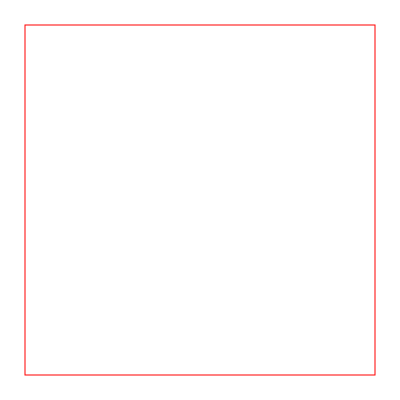

In [14]:
box2d.svg

In [15]:
box2d.edit()

<IPython.core.display.Javascript object>